Convert documents to vectors → normalize document vectors → convert query to vector → normalize query → compute dot-product similarities → sort documents by similarity → print ranked results → reduce document vectors to 2D using PCA → plot them in vector space.

In [ ]:
!pip install -q numpy scikit-learn matplotlib

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
documents = [
    "Climate change affects global temperature",
    "Global warming impacts weather patterns",
    "Artificial intelligence transforms industries",
    "NLP is a subset of Artificial intelligence",
    "Renewable energy reduces climate change"
]

In [ ]:
vectorizer = CountVectorizer() #Converts text into numerical vectors.
X = vectorizer.fit_transform(documents) #learns the vocabulary from all docs and converts each doc into a numerical vector of word counts in one step
X = X.toarray() #Converts the sparse matrix into a regular NumPy array

In [ ]:
print("Shape of X:", X.shape) #(5, vocabulary_size)
print("Vocabulary:", vectorizer.get_feature_names_out()) # retrieve all vocabs
print("Document vectors:\n", X)

"""
The value in each cell (i, j) represents how many
times the j-th word appears in the i-th document
"""

Shape of X: (5, 20)
Vocabulary: ['affects' 'artificial' 'change' 'climate' 'energy' 'global' 'impacts'
 'industries' 'intelligence' 'is' 'nlp' 'of' 'patterns' 'reduces'
 'renewable' 'subset' 'temperature' 'transforms' 'warming' 'weather']
Document vectors:
 [[1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]]


In [ ]:
similarity_matrix = np.dot(X, X.T) #Each cell tells how similar two docs are
print("Similarity matrix:\n", similarity_matrix)

Similarity matrix:
 [[5 1 0 0 2]
 [1 5 0 0 0]
 [0 0 4 2 0]
 [0 0 2 6 0]
 [2 0 0 0 5]]


In [ ]:
#keepdims=True: keeps it as a 2D column vector with shape (5,1)
#axis=1: compute the norm row-wise (for each document vector)

norms = np.linalg.norm(X, axis=1, keepdims=True) #Computes the length of each document vector
X_normalized = X / norms # For example- A / ||A||- normalizing every doc
cosine_similarity = np.dot(X_normalized, X_normalized.T)

#Normalization makes all vectors the same length (1), so we compare what words they contain, not how many times they appear

"""
The purpose of normalizing in cosine similarity is to
remove the influence of document length, so the similarity
is purely based on the angle between the vectors,
indicating semantic content rather than word count
"""

print("Cosine similarity:\n", cosine_similarity)

Cosine similarity:
 [[1.         0.2        0.         0.         0.4       ]
 [0.2        1.         0.         0.         0.        ]
 [0.         0.         1.         0.40824829 0.        ]
 [0.         0.         0.40824829 1.         0.        ]
 [0.4        0.         0.         0.         1.        ]]


In [ ]:
def search(query, documents, vectorizer, X_normalized):
    query_vec = vectorizer.transform([query]).toarray() #converts query text into a numerical vector using same vocab as the documents
    query_vec = query_vec / np.linalg.norm(query_vec) #normalizes the vector to length 1

    similarities = np.dot(X_normalized, query_vec.T).flatten() #Computes dot product between all document vectors and the query vector

    ranked_indices = np.argsort(similarities)[::-1] #Sorts indices of documents from highest similarity to lowest

    for idx in ranked_indices:
        print(f"Score: {similarities[idx]:.3f} | Document: {documents[idx]}") #Loops through docs in order of similarity and prints score + doc

In [ ]:
search("machine intelligence climate", documents, vectorizer, X_normalized)

Score: 0.354 | Document: Artificial intelligence transforms industries
Score: 0.316 | Document: Renewable energy reduces climate change
Score: 0.316 | Document: Climate change affects global temperature
Score: 0.289 | Document: NLP is a subset of Artificial intelligence
Score: 0.000 | Document: Global warming impacts weather patterns


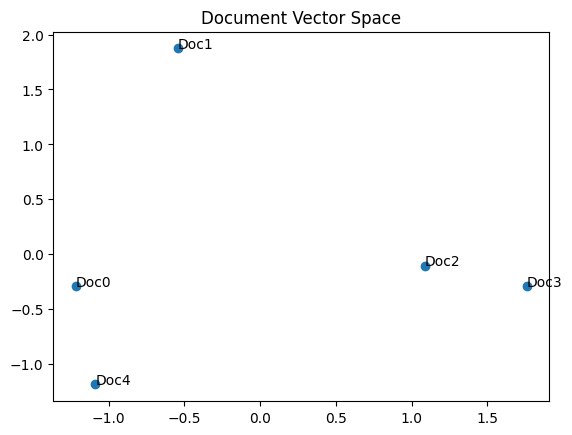

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:,0], X_2d[:,1])

for i, doc in enumerate(documents):
    plt.annotate(f"Doc{i}", (X_2d[i,0], X_2d[i,1]))

plt.title("Document Vector Space")
plt.show()